# Advanced Methods

## NumPy 

NumPy is the most fundamental scientific computing package in Python. It allows for the creation of "NumPy arrays"; data structures that function nearly identically to lists, but with multiple additional features to facilitate and speed-up numerical calculations.

NumPy arrays are homogeneous, leading to a lesser memory consumption and vectorize relevant mathematical operations to apply to all elements.

In [ ]:
import numpy as np

In [ ]:
vc = [1, 2, 3]
vc

What if you want to multiply every element by 3?

In [ ]:
3*vc #New list becomes vc repeated 3 times on axis 0.

In [ ]:
for i in range(len(vc)):
    vc[i] = 3*vc[i]
vc

Instead of iterating over a for loop each time we want to apply an operation to every element of an array, we use the inherent functionality of a NumPy array:

In [ ]:
vc1 = np.array([1, 2, 3])
vc1

In [ ]:
3*vc1

Besides convenience, NumPy is intelligently designed to perform array operations far quicker!

In [ ]:
vc2 = np.ones(100000) #Shift-tab inside np.ones(.

In [ ]:
import time 

begin = time.time()
vc3 = 11*vc2**2/np.exp(vc2)
end = time.time()

interval = end-begin
print("{} seconds".format(interval))

In [ ]:
import time 

begin = time.time()
for i in range(np.size(vc2)):
    vc2[i] = 11*vc2[i]**2/np.exp(vc2[i])
end = time.time()
interval2 = end-begin
print("{} seconds".format(interval2))

In [ ]:
interval2/interval

### Convenient NumPy functions:

In [ ]:
np.zeros(10) #Shift-tab for documentation!

In [ ]:
np.ones(10)

In [ ]:
c = np.arange(4) #Like range, but every element is in a numpy array.
c

In [ ]:
c.max()

In [ ]:
c.min()

In [ ]:
c.sum()

In [ ]:
sp = np.linspace(0,1,11)
sp

In [ ]:
four_by_three = np.ones((4,3))
four_by_three.shape

In [ ]:
for i in range((four_by_three.shape)[0]):
    for j in range((four_by_three.shape)[1]):
        print("row {}, column {}".format(i,j))

In [ ]:
a = np.arange(6)
a

In [ ]:
b = a.reshape(3, 2)
b

## Array Operations

When performing operations with arrays, note array dimensions!

In [ ]:
x = (np.arange(4)).reshape(2,2)
y = (np.arange(4,8)).reshape(2,2)
print(x)
print(y)

In [ ]:
x+y

In [ ]:
x*y

In [ ]:
x/y

In [ ]:
x.shape

In [ ]:
r = np.array([1,2])
r.shape

The above is equivalent to a 1x2 array.

In [ ]:
x+r

In [ ]:
r = np.array([[1,2]])
r.shape

In [ ]:
x+r

In [ ]:
r = np.array([[1],[2]])
r.shape

In [ ]:
x+r

#### What if I want to make an array such that:
A = $\begin{bmatrix} a_{11} & a_{12}\\ a_{21} & a_{22} \end{bmatrix}$, B = $\begin{bmatrix}
b_{11} & b_{12}\\
b_{21} & b_{22}
\end{bmatrix}$, and C = $\begin{bmatrix}
a_{11}B & a_{12}B\\
a_{21}B & a_{22}B
\end{bmatrix}$


In [ ]:
ref = x[:,:,None,None]

In [ ]:
ref.shape

In [ ]:
ref*y

Slicing arrays with "None" creates a new axis of length 1. This allows operations between arrays of different dimensions, or customized array multiplication like the above.

## Examples

In [ ]:
import matplotlib.pyplot as plt

## Check $\sum_{n=1}^{n} k = \frac{n(n+1)}{2}$

In [ ]:
k = np.arange(1,1000)
n = k.size
print(n)
print(k.sum())
print(n*(n+1)/2)

## Plot xsin(x)

In [ ]:
x = np.linspace(-2*np.pi,2*np.pi,1000)
y = x*np.sin(x)

plt.plot(x,y)
plt.title("y vs. x")
plt.xlabel("x")
plt.ylabel("y = f(x)")
plt.show()

## Linear Algebra

### Matrix Multiplication

In [ ]:
A = np.array([[2, 4], [3,5]])
b = np.array([1,2])
A@b

In [ ]:
B = np.array([[3,5],[1,2]])
A@B

### Transpose

In [ ]:
A = np.array([[2, 4], [3,5]])
A.T

### Solve Ax = b

### $$2x+4y = 1 \\ 3x+5y = 2$$

In [ ]:
A = np.array([[2, 4], [3,5]])
b = np.array([1,2])
x = np.linalg.solve(A,b)
x

### Find eigenvectors/eigenvalues

In [ ]:
A = np.array([[2, 0], [0,5]])
w, v = np.linalg.eig(A)
w

In [ ]:
v #Note, columns are eigenvectors, not rows.

## Calculus

## Find $\frac{d}{dx}(x^2+1)$ numerically:

In [ ]:
#Derivative: np.gradient(y(array), dx(step size)).

x = np.linspace(0,10,1000)
dx = x[1]-x[0]
y = x**2 + 1
dydx = np.gradient(y, dx)

plt.plot(x, dydx)
plt.show()

## Find $\int_{-1}^1 x $ numerically:

In [ ]:
#Integral: np.trapz(y(array)).
x = np.linspace(-1,1,10000)
y = x
np.trapz(y)


## Plot $\int_{0}^x 2x $ numerically:

In [ ]:
x = np.linspace(0,3,10000)
N = 100
res = int(x.size/N)
y_list = np.empty(res)
ys = 0
for i in range(res):
    x1 = x[0:(i+1)*N]
    ys = np.trapz(2*x1, x = x1)
    y_list[i] = ys
    

In [ ]:
plt.plot(x[0:-1:N],y_list)

## Differential Equations

## Solve $\frac{dy}{dt} = ry(M-y)$

In [ ]:
from scipy.integrate import odeint

In [ ]:
#Diffeq on function below:
y0 = 1
M = 100
r = 0.5
def dydt(y,t):
    return r*y*(M-y)


In [ ]:
#ODEs: odeint(func, y0(scalar), t(array)).
t = np.linspace(0,1,1000)
sol = odeint(dydt, y0,t)

In [ ]:
plt.plot(t,sol)
plt.show()

## Solve $\theta''=sin\theta$

### SciPy can't solve 2nd-order ODEs, so you have to turn this problem into a 1st-order problem. i.e:
### define $\omega = \frac{d\theta}{dt}$; then:
### $$\frac{d\omega}{dt} = sin\theta\\ \frac{d\theta}{dt} = \omega$$

### Let S = ($\theta,$ $\omega$):

In [ ]:
def dSdt(S,t):
    theta, omega = S
    return [omega, np.sin(theta)]

theta0 = np.pi/2
omega0 = 0
S0 = (theta0,omega0)

In [ ]:
t = np.linspace(0,20,1000)
sol = odeint(dSdt, S0,t)

In [ ]:
plt.plot(t,sol)
plt.legend(["θ","ω"])
plt.show()

## Misc. Examples

## Make a simple root-solver:

Newton's method for finding roots:
Given initial guess $x_0$: 
### $$x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}$$

In [ ]:
def roots(func, x0, tol = 1e-6, h = 1e-3): #tol is the max error allowed, h is the step-size for derivative calculations.
    error = 1
    x = x0
    while error>tol:
        deriv = (f(x+h)-f(x))/h
        xref = x
        x = x-func(x)/deriv
        error = np.abs(xref-x)
    return x

In [ ]:
def f(x):
    return np.sin(x)

In [ ]:
roots(f,1)

In [ ]:
roots(f,4)

### This is deceptively powerful; given $f(x) = g(x)$, instead of solving the equation analytically for a given x:
### $$f(x) = g(x) \Rightarrow f(x)-g(x) = 0$$
### and one can solve for the roots of $f(x) - g(x)$ to find the points of intersection.

### Solve for x such that: $x = sin(x)$.

In [ ]:
def r(x):
    return x-np.sin(x)

In [ ]:
roots(r,1)

In [ ]:
#sin(0.01816907728816747)

### The 1D heat equation is given by:
### $$\frac{\partial T}{\partial t} = \alpha \frac{\partial ^2 T}{\partial x^2}$$



### One can discretize this PDE to solve for the temperature at the next time step: 
### $$T_i^{n+1} = T_i^n+\alpha \frac{\Delta t}{\Delta x^2} (T_{i+1}^n-2T_i^n+T_{i-1}^n)$$

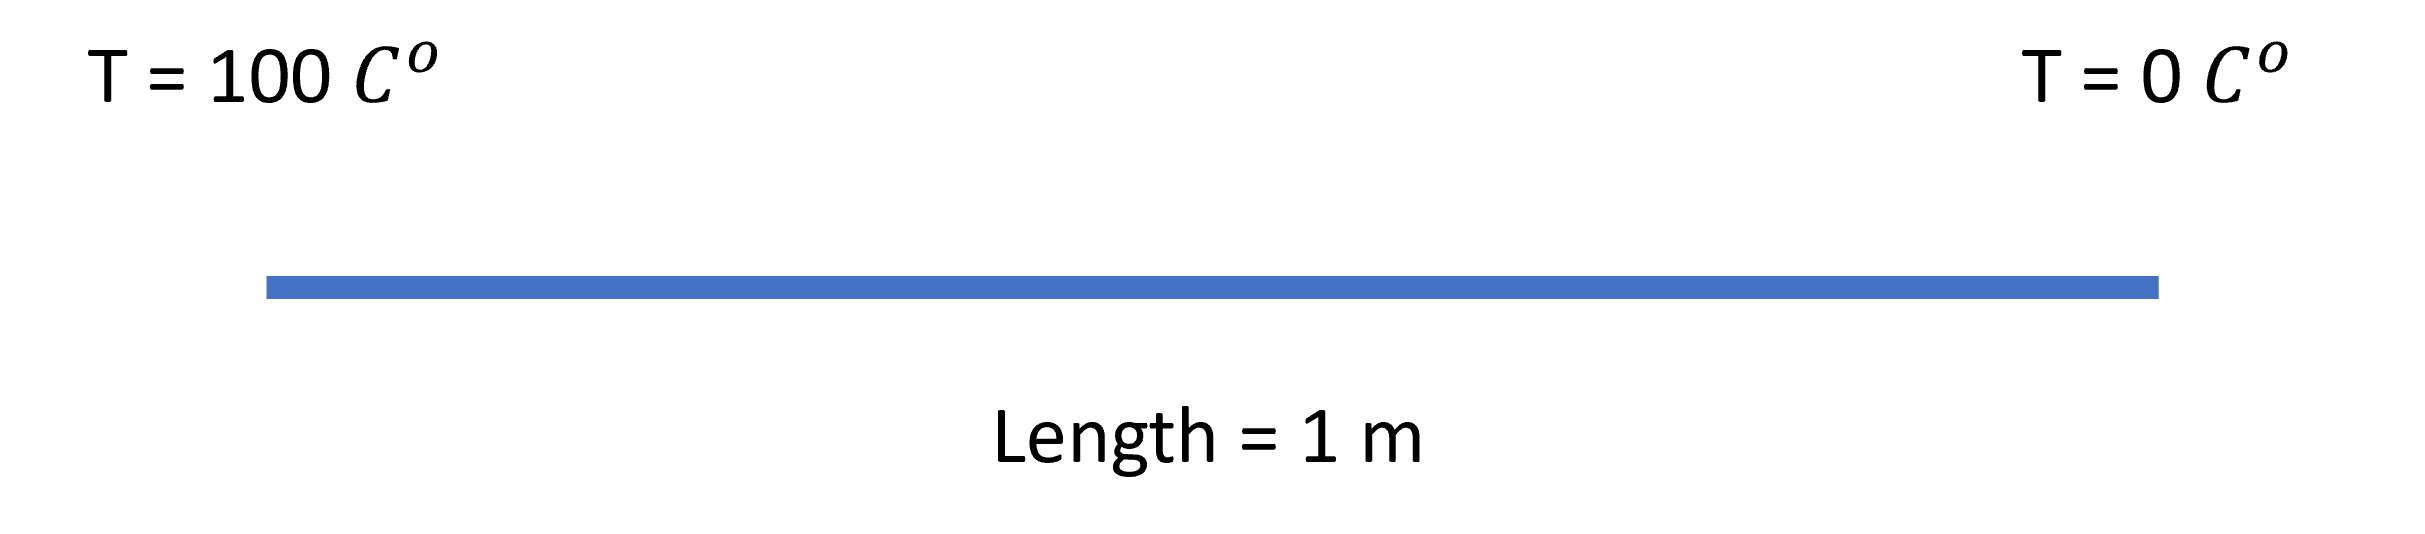

In [ ]:
T0 = 100
L = 1
Nx = 101
dx = L/(N-1)
x = np.linspace(0,1,Nx)
alpha = 1e-3
Nt = 101
sigma = 0.50
dt = sigma * dx**2 / alpha  

def temp(T0, t_steps, delta_t, delta_x, alpha):
    T = np.zeros(Nx)
    T[0] = T0
    sigma = alpha * delta_t / delta_x**2
    for n in range(t_steps):
        T[1:-1] = (T[1:-1] +
                   sigma * (T[2:] - 2.0 * T[1:-1] + T[:-2]))
    return T

T = temp(T0, Nt, dt, dx, alpha)

In [ ]:
# Plot the temperature along the rod.
plt.figure(figsize=(6.0, 4.0))
plt.xlabel('Distance [m]')
plt.ylabel('Temperature [C]')
plt.grid()
plt.plot(x, T, color='C0', linestyle='-', linewidth=2)
plt.xlim(0.0, L)
plt.ylim(0.0, 100.0);